In [1]:
%matplotlib inline
import thesis
chapter = 'cmb'
save = True

In [2]:
from scipy.constants import c, h, k as k_B

In [3]:
# In W m^-2 sr^-1 Hz^-1
def black_body(nu, T):
    return 2 * h * nu**3 * c**-2 * (np.exp(h * nu / (k_B * T)) - 1 )**-1

In [4]:
# 1 = 100 cm / 1 m
cm_per_m = 100

# f = c / \lambda
icm_per_Hz = c * cm_per_m

# 1 = (1 Jy) / (10−26 W m−2 Hz−1)
W_per_throughput_per_Hz_to_Jy = 1e26

In [5]:
# COBE/FIRAS CMB monopole spectrum
# Reference1 = Table 4 of Fixsen et al. 1996 ApJ 473, 576.
# Reference2 = Fixsen & Mather 2002 ApJ 581, 817.
# Column 1 = frequency from Table 4 of Fixsen et al., units = cm^-1
# Column 2 = FIRAS monopole spectrum computed as the sum
#             of a 2.725 K BB spectrum and the
#             residual in column 3, units = MJy/sr
# Column 3 = residual monopole spectrum from Table 4 of Fixsen et al.,
#             units = kJy/sr
# Column 4 = spectrum uncertainty (1-sigma) from Table 4 of Fixsen et al.,
#             units = kJy/sr
# Column 5 = modeled Galaxy spectrum at the Galactic poles from Table 4 of
#             Fixsen et al., units = kJy/sr
#
# 
# Revision History: 
#  v1  : initial release, May 2005
#
(frequency_icm,
 spectrum_MJy_per_sr,
 residual_kJy_per_sr, 
 uncertainty_kJy_per_sr, 
 galaxy_kJy_per_sr) = np.loadtxt('firas_monopole_spec_v1.txt',
                                 skiprows=18, unpack=True)

In [6]:
np.diff(frequency_icm)

array([ 0.45,  0.46,  0.45,  0.45,  0.46,  0.45,  0.46,  0.45,  0.45,
        0.46,  0.45,  0.45,  0.46,  0.45,  0.46,  0.45,  0.45,  0.46,
        0.45,  0.45,  0.46,  0.45,  0.46,  0.45,  0.45,  0.46,  0.45,
        0.45,  0.46,  0.45,  0.46,  0.45,  0.45,  0.46,  0.45,  0.46,
        0.45,  0.45,  0.46,  0.45,  0.45,  0.46])

In [7]:
frequency = icm_per_Hz * frequency_icm
nu = np.linspace(1, 700e9, 10000)
T_cmb = 2.725
I_cmb = black_body(nu=nu, T=T_cmb)
I_cmb_Jy = W_per_throughput_per_Hz_to_Jy * I_cmb
f_scale = 1e-9

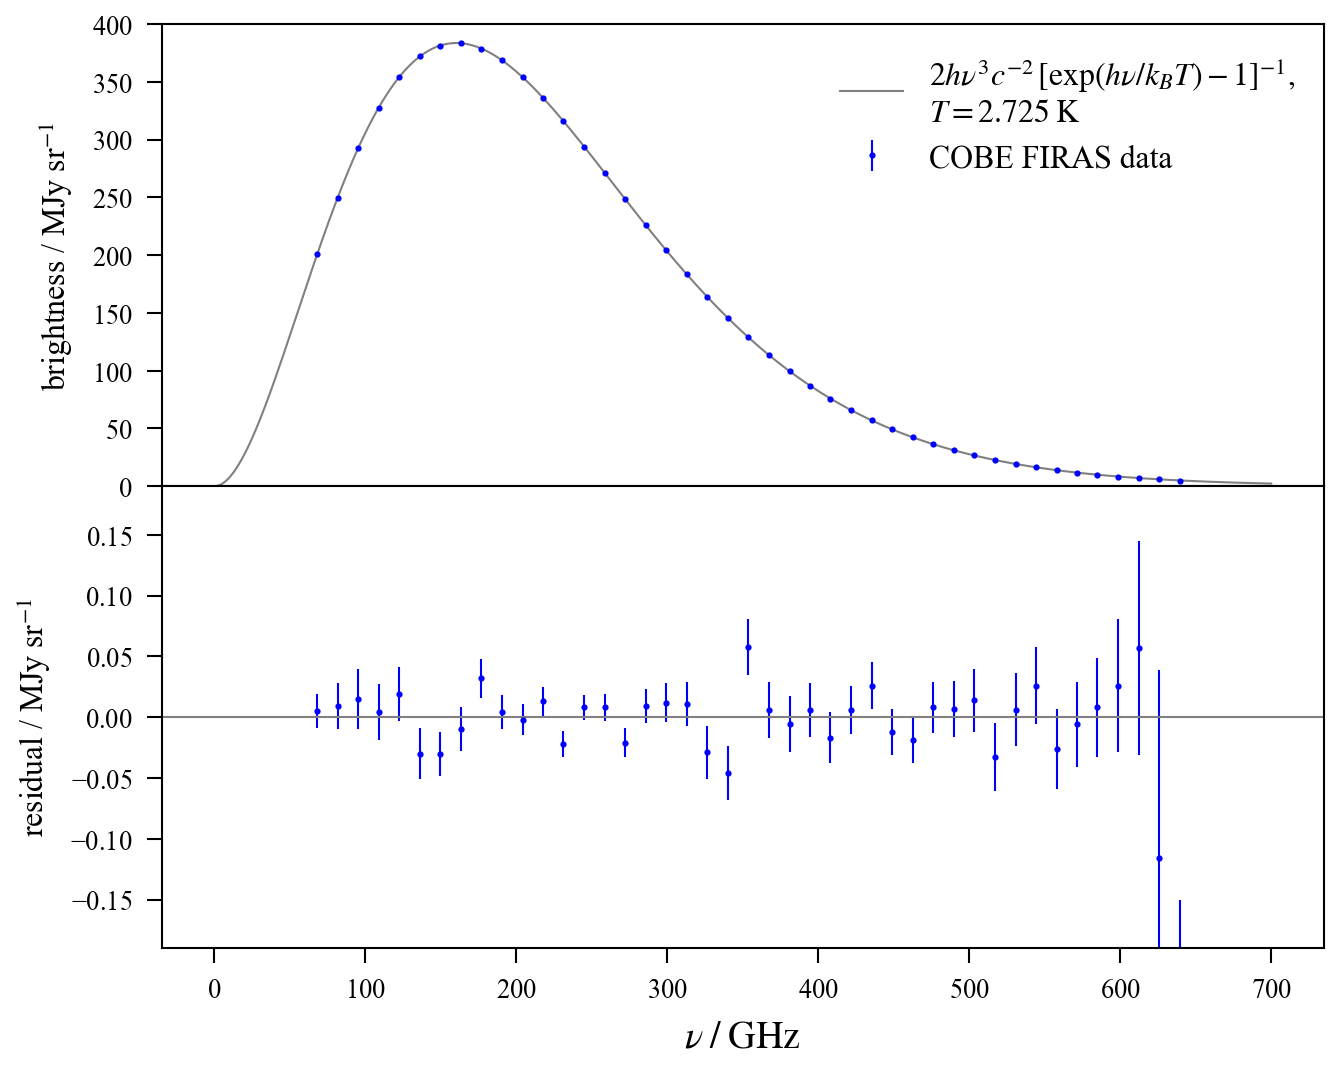

In [8]:
with plt.rc_context({'figure.subplot.hspace': 0}):
    fig, (spectrum_ax, residual_ax) = plt.subplots(2, 1, figsize=(5, 4), sharex=True)
    spectrum_ax.plot(f_scale * nu, 1e-6 * I_cmb_Jy, color='gray',
                     label=r'$2 h \nu^3 c^{-2} \, [\exp (h \nu / k_B T) -1]^{-1},$' + '\n' + '$T = 2.725 \; \mathrm{K}$')
    spectrum_ax.errorbar(f_scale * frequency, spectrum_MJy_per_sr, yerr=1e-3 * uncertainty_kJy_per_sr,
                         marker='.', linestyle='none', color='blue', label='COBE FIRAS data')
    residual_ax.axhline(0, color='gray')
    residual_ax.errorbar(f_scale * frequency, 1e-3 * residual_kJy_per_sr, yerr=1e-3 * uncertainty_kJy_per_sr,
                         marker='.', linestyle='none', color='blue')
    
    spectrum_ax.tick_params(labelsize='xx-small')
    residual_ax.tick_params(labelsize='xx-small')
    spectrum_ax.set_ylim(0, 400)
    residual_ax.set_ylim(-0.19, 0.19);
    residual_ax.set_xlabel(r'$\nu \; / \; \mathrm{GHz}$')
    spectrum_ax.set_ylabel('brightness / MJy sr$^{-1}$', fontsize='x-small')
    residual_ax.set_ylabel('residual / MJy sr$^{-1}$', fontsize='x-small')
    spectrum_ax.legend(loc='upper right', fontsize='x-small', numpoints=1)

if save:
    fig.savefig(thesis.full_filename(chapter, 'firas_monopole_spectrum.pdf'))